In [2]:
import numpy as np
from pylab import plt
import seaborn as sns
import plotly.plotly as py
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [3]:
plt.style.use('seaborn')
%matplotlib inline
init_notebook_mode(connected=True)

In [4]:
import fxcmpy
con = fxcmpy.fxcmpy(config_file = 'fxcm.cfg', server='demo')

In [5]:
symbol_info = con.get_offers(kind='dataframe')

In [6]:
symbol_swap = symbol_info[['currency', 'rollB', 'rollS']]
symbol_swap.index = symbol_swap['currency']
symbol_swap.drop(['currency'],axis=1, inplace=True)
symbol_swap

C:\Users\ballmdr\Anaconda3\envs\quant\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,rollB,rollS
currency,,
EUR/USD,-38.970,18.000
USD/JPY,14.610,-30.120
GBP/USD,-25.650,12.510
USD/CHF,17.970,-37.260
EUR/CHF,2.310,-4.080
AUD/USD,-7.530,2.160
USD/CAD,4.230,-9.480
NZD/USD,-3.210,1.980
EUR/GBP,-15.000,7.110


In [15]:
#symbols = con.get_instruments()
#symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD']
#symbols = ['EUR/USD', 'EUR/NZD', 'EUR/CAD', 'EUR/CHF', 'EUR/AUD', 'EUR/JPY']
symbols = ['AUD/CAD', 'AUD/CHF', 'AUD/JPY', 'AUD/NZD']

In [16]:
df = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='m5', number=5760) #20 Days
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2

In [17]:
last_price = dict()
for symbol in symbols:
    last_price[symbol] = (df[symbol].iloc[-1]['bidclose'] + df[symbol].iloc[-1]['askclose'])/2

In [18]:
newdf = df

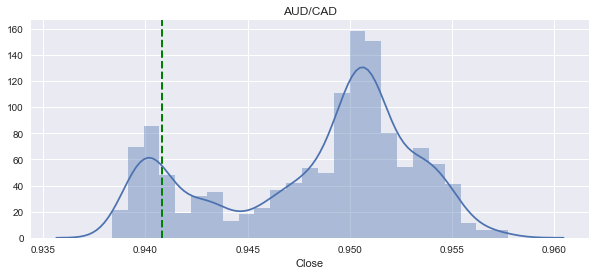

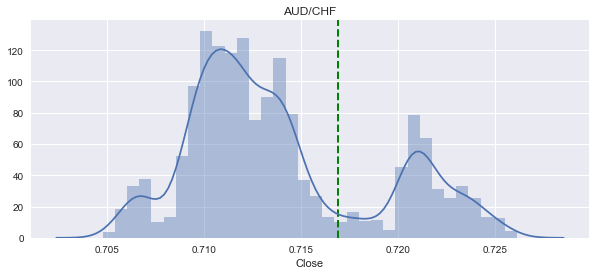

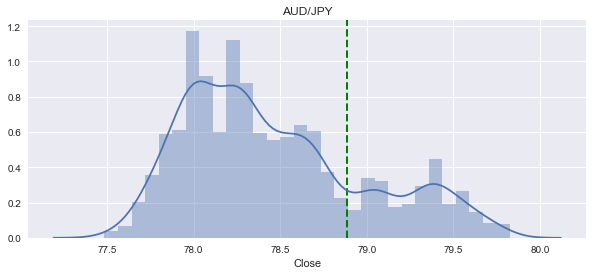

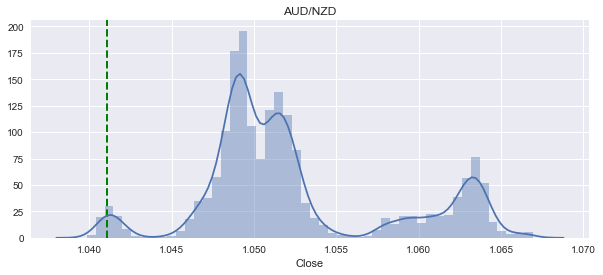

In [20]:
for symbol in symbols:
    plt.figure(figsize=(10,4))
    plt.axvline(x=last_price[symbol], color='green', linestyle='--', linewidth=2)
    plt.title(symbol)
    sns.distplot(newdf[symbol]['Close'])

In [21]:
def getRP(price, symbol, stoploss):
    exchange = {
        'USD': 1,
        'JPY': 0.00910254,
        'CAD': 0.763864,
        'CHF': 1.00342,
        'GBP': 1.29598,
        'NZD': 0.684647,
        'AUD': 0.712489
    }
    point = 10000
    pipval = 10/100
    rp = (price - stoploss) * point * pipval
    s = symbol.split('/')
    rp = rp * exchange[s[1]]
    return rp

SWAP Table
           rollB   rollS
currency                
EUR/USD  -38.970  18.000
USD/JPY   14.610 -30.120
GBP/USD  -25.650  12.510
USD/CHF   17.970 -37.260
EUR/CHF    2.310  -4.080
AUD/USD   -7.530   2.160
USD/CAD    4.230  -9.480
NZD/USD   -3.210   1.980
EUR/GBP  -15.000   7.110
EUR/JPY   -5.070   1.950
AUD/JPY    6.990 -15.480
FRA40     -0.040  -0.050
GER30     -0.090  -0.100
NAS100    -0.110  -0.010
UK100     -0.100  -0.040
US30      -0.400  -0.020
XAU/USD   -0.240  -0.030
XAG/USD   -0.030  -0.006
BTC/USD   -0.025   0.008


AUD/CAD Zone [stop@4SD]
zone1: $22.0
zone2: $22.0
zone3: $15.0
zone4: $7.0
Total RP: $66.0


AUD/CHF Zone [stop@4SD]
zone1: $32.0
zone2: $29.0
zone3: $19.0
zone4: $10.0
Total RP: $90.0


AUD/JPY Zone [stop@4SD]
zone1: $32.0
zone2: $29.0
zone3: $19.0
zone4: $10.0
Total RP: $90.0


AUD/NZD Zone [stop@4SD]
zone1: $26.0
zone2: $24.0
zone3: $16.0
zone4: $8.0
Total RP: $74.0




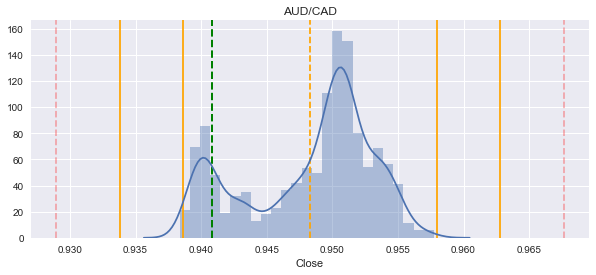

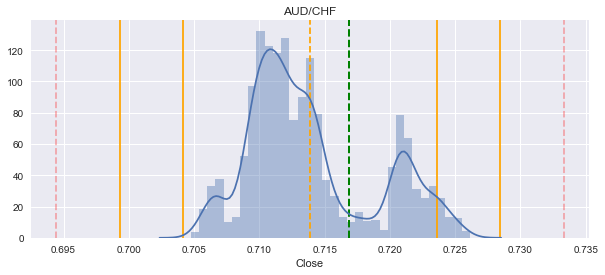

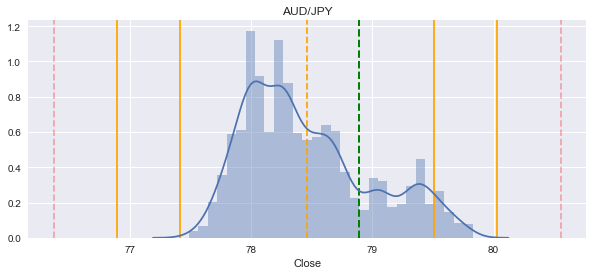

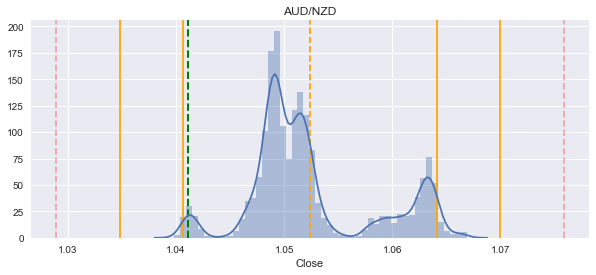

In [22]:
print('SWAP Table')
print(symbol_swap)
print('\n')
for symbol in symbols:
    
    mean = np.mean(newdf[symbol]['Close'])
    sd = np.std(newdf[symbol]['Close'])
    high = np.max(newdf[symbol]['askhigh'])
    low = np.min(newdf[symbol]['asklow'])
     
    plt.figure(figsize=(10,4))
    plt.axvline(x=last_price[symbol], color='green', linestyle='--', linewidth=2)
    plt.axvline(x=mean, color='orange', linestyle='--')
    plt.axvline(x=mean+sd*2, color='orange')
    plt.axvline(x=mean-sd*2, color='orange')
    plt.axvline(x=mean+sd*3, color='orange')
    plt.axvline(x=mean-sd*3, color='orange')
    plt.axvline(x=mean+sd*4, color='red', linestyle='--', alpha=0.3)
    plt.axvline(x=mean-sd*4, color='red', linestyle='--', alpha=0.3)
    plt.title(symbol)
    
    
    zone = [0, 1, 2, 3]
    bullet_zone = 1
    stoploss = mean-sd*4
    print(symbol + ' Zone [stop@4SD]')
    #print("swap: \n" + str(symbol_swap.loc[symbol]))
    zone[0] = round(getRP(high, symbol, stoploss),0 )
    zone[1] = round(getRP(mean+sd*2, symbol, stoploss), 0)
    zone[2] = round(getRP(mean, symbol, stoploss), 0)
    zone[3] = round(getRP(mean-sd*2, symbol, stoploss), 0)
    for i in range(4):    
        print("zone" + str(i+1) + ": $" + str(zone[i] * bullet_zone))
    
    z = np.array(zone)
    print("Total RP: $" + str(z.sum() * bullet_zone))
    
    
    print("\n")
        
    sns.distplot(newdf[symbol]['Close'])